<a href="https://colab.research.google.com/github/followviny/ML_kaggle/blob/main/recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<small><font color=gray>Notebook authors: <a href="https://www.linkedin.com/in/olegmelnikov/" target="_blank">Oleg Melnikov</a>, <a href="https://www.hse.ru/en/org/persons/223985242/" target="_blank">Alexey Boldyrev</a>, <a href="https://www.hse.ru/en/staff/mekarpov" target="_blank">Maksim Karpov</a>, <a href="https://www.hse.ru/en/staff/ramazyant" target="_blank">Tigran Ramazyan</a> ©2024</font></small><hr style="margin:0;background-color:silver">


**[<font size=6>🔢Recognizer</font>](https://www.kaggle.com/t/07e034829d754167973145bbfd4d44ff)**. [**Instructions**](https://colab.research.google.com/drive/1owkYjuRGkx050LQnM3b3yTzd0Dr2XbeV) for running Colabs.

We consent to sharing our Colab (after the assignment ends) with other students/instructors for educational purposes.


The data set is similar to [MNIST](https://en.wikipedia.org/wiki/MNIST_database) with each row as a flattened image. However, the digits are not hand-written, but distorted, scaled, shifted, etc.

* `dfYX` contains labels (1 or 7) in the first column and pixel brightness intensities in other columns. Each row's 1024 features can be reshaped to 32x32 images of digits
* `dfX ` contains images (as row vectors) only and no labels. Your trained model will derive the labels for these test images. Then you'll submit these to Kaggle.com

In [ ]:
%reset -f
from IPython.core.interactiveshell import InteractiveShell as IS; IS.ast_node_interactivity = "all"
import pandas as pd, numpy as np, matplotlib.pyplot as plt, time
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
RunTimeLimit, t0 = 120, time.time() # time limit for your model and starting time
np.set_printoptions(linewidth=10000, precision=4, edgeitems=20, suppress=True)

class Timer():
  def __init__(self, lim:'RunTimeLimit'=120): self.t0, self.lim, _ = time.time(), lim, print(f'⏳ started. You have {lim} sec. Good luck!')
  def ShowTime(self):
    msg = f'Runtime is {time.time()-self.t0:.0f} sec'
    print(f'\033[91m\033[1m' + msg + f' > {self.lim} sec limit!!!\033[0m' if (time.time()-self.t0-1) > self.lim else msg)

pd.set_option('display.max_rows', 100, 'display.max_columns', 100, 'display.max_colwidth', 100, 'display.precision', 2, 'display.max_rows', 4)
dfYX = pd.read_csv('trainYX/trainYX.csv', index_col='id')
dfYX

,y,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3,227,233,237,235,233,233,230,226,232,235,241,245,239,229,227,233,232,229,226,227,230,232,232,230,248,235,242,247,238,242,246,231,230,234,237,235,234,234,229,223,229,231,237,242,240,232,231,235,235,...,229,233,219,227,234,237,238,239,237,232,230,224,229,236,232,228,232,234,241,234,230,232,234,233,235,238,241,245,240,237,240,236,235,244,237,244,238,222,221,235,240,234,237,227,233,240,230,223,227,229
1,8,232,250,252,238,228,238,244,241,252,253,251,225,252,252,202,242,242,203,254,254,226,252,254,252,239,242,238,216,244,249,254,240,211,207,229,209,231,244,255,255,246,255,245,210,249,235,187,243,242,...,193,240,242,186,234,249,211,246,255,248,255,255,246,220,215,226,210,218,229,255,255,245,211,237,247,247,252,255,255,227,249,248,198,248,241,201,252,252,225,252,254,253,243,245,240,216,243,247,251,237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4998,3,241,242,243,241,239,238,238,240,242,242,242,242,242,240,239,238,238,236,237,243,246,243,241,242,240,239,239,240,241,242,241,240,238,240,241,240,238,238,239,240,244,244,244,243,241,238,236,234,235,...,217,219,224,228,233,239,244,245,244,242,241,240,239,238,238,237,237,238,241,242,241,238,240,243,241,237,240,237,237,238,236,230,227,229,231,233,236,241,245,246,244,242,240,240,239,238,238,239,239,239
4999,3,248,244,242,246,249,248,248,250,250,247,244,244,247,249,249,248,246,247,248,249,249,249,249,248,251,252,250,245,240,241,247,254,253,248,246,249,250,249,249,252,249,249,249,250,249,248,245,243,246,...,251,246,248,244,244,249,250,248,246,248,253,250,247,245,242,241,245,250,249,247,245,247,249,251,250,248,250,249,236,244,249,245,252,246,252,243,243,252,251,241,244,255,250,247,247,250,249,245,244,246


This test file is missing a column of digit labels, which you need to predict

In [ ]:
dfX = pd.read_csv('testX/testX.csv', index_col='id')
dfX

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,...,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5000,242,242,242,241,240,239,238,237,235,235,236,235,233,232,231,231,235,234,234,236,239,238,234,230,234,232,230,230,232,235,235,235,240,240,240,240,239,237,236,235,232,233,234,234,234,233,232,230,235,234,...,233,234,234,235,234,232,232,234,238,240,232,234,234,232,233,236,234,230,230,229,229,229,230,231,233,235,233,232,233,234,233,231,232,233,229,233,235,234,233,233,233,233,234,238,238,235,234,236,235,231
5001,243,230,235,224,240,227,238,235,232,211,238,240,229,238,229,228,222,241,231,254,231,224,231,241,236,241,221,224,242,210,222,230,228,231,223,242,231,238,224,227,235,225,244,234,223,240,236,230,233,243,...,219,245,233,255,227,240,234,248,237,222,239,228,241,237,238,243,228,237,252,241,226,248,209,235,237,248,241,222,253,222,246,225,242,240,249,197,233,234,224,203,243,229,226,242,247,252,238,222,235,243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9998,248,247,248,240,228,236,252,255,221,216,255,250,231,226,211,252,255,217,217,244,249,247,230,214,255,253,238,229,239,246,245,248,247,246,251,247,237,244,254,252,253,235,252,255,255,255,240,255,255,232,...,244,255,250,255,243,249,238,252,237,248,244,248,244,250,255,240,229,245,249,246,247,239,229,237,252,254,214,222,246,255,226,227,212,255,255,210,236,230,253,255,204,228,253,255,235,208,236,255,248,245
9999,234,233,233,234,236,237,237,236,234,231,230,233,233,231,232,236,236,234,235,238,242,243,240,237,236,235,234,234,235,236,238,240,235,233,232,233,235,235,234,232,232,229,229,233,233,230,231,234,233,232,...,235,237,237,237,237,237,235,233,231,229,233,235,238,239,237,234,233,233,236,237,236,233,229,228,231,234,237,237,235,233,232,233,235,238,238,239,240,239,236,234,233,234,228,232,236,238,237,235,233,233


Here are the first few digits.

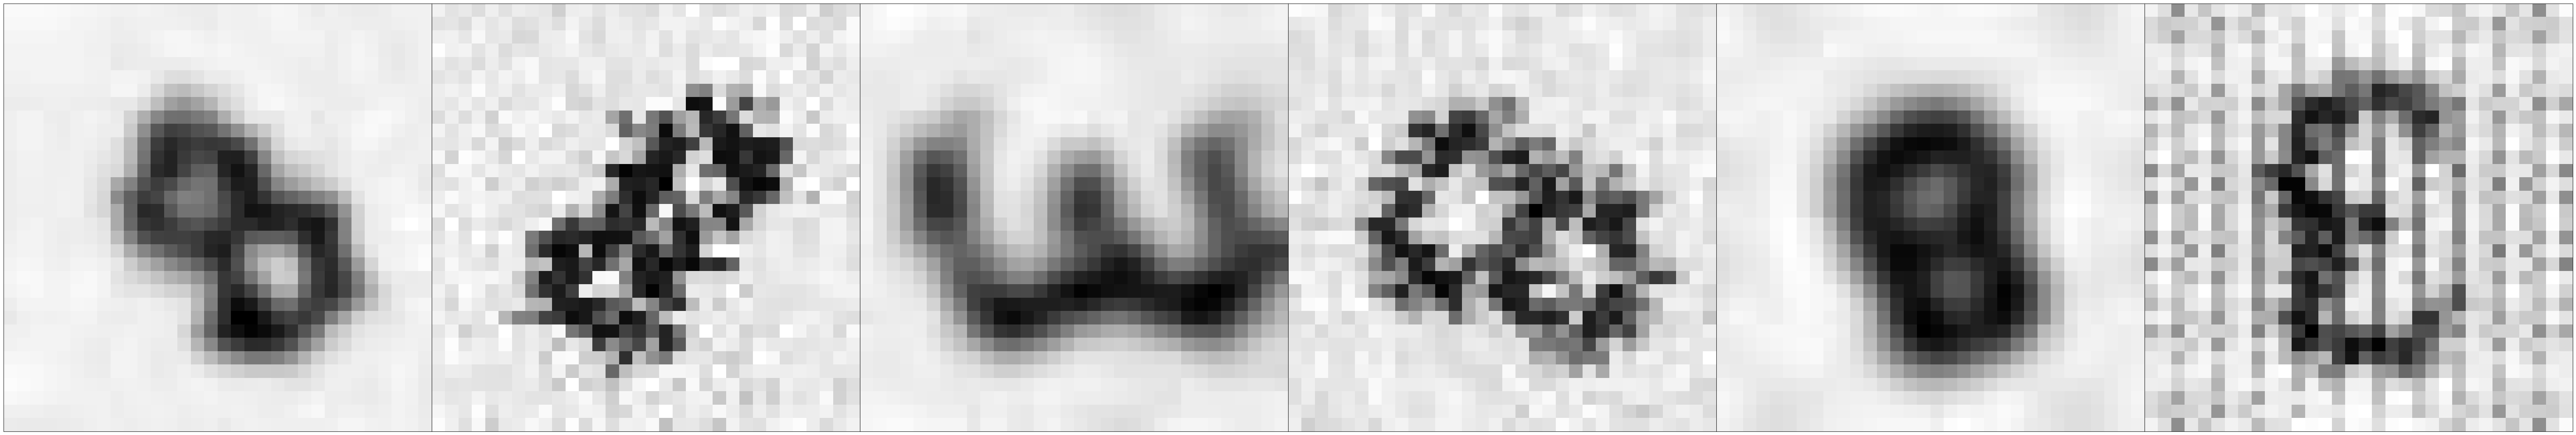

In [ ]:
X = dfX.values
n_col, w = 6, 32
_ = plt.figure(figsize=(6*12,12))
for i in range(n_col):
    ax = plt.subplot(1, n_col, i + 1)
    _ = plt.imshow(X[i,].reshape(w,w).astype('float'), cmap='gray')
    _, _ = plt.xticks([]), plt.yticks([]);
_ = plt.tight_layout(pad=0)
_ = plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
def extract_quad_features(images, image_size=32, quads=4):
    quad_size = image_size // quads
    n_samples = images.shape[0]
    quad_features = []

    for img in images:
        img_reshaped = img.reshape(image_size, image_size)
        features = []
        for i in range(0, image_size, quad_size):
            for j in range(0, image_size, quad_size):
                quad = img_reshaped[i:i + quad_size, j:j + quad_size]
                features.append(np.mean(quad))  # Av. pixel intensity in the quad
        quad_features.append(features)

    return np.array(quad_features)

In [ ]:
def extract_enhanced_quad_features(images, image_size=32, quads=8):
    basic_features = extract_quad_features(images, image_size, quads)

    center_start = image_size // 3
    center_end = (image_size * 2) // 3

    edge_features = []
    for img in images:
        img_reshaped = img.reshape(image_size, image_size)

        grad_y, grad_x = np.gradient(img_reshaped)
        edge_magnitude = np.sqrt(grad_x**2 + grad_y**2)

        center_region = img_reshaped[center_start:center_end, center_start:center_end]
        edge_center = edge_magnitude[center_start:center_end, center_start:center_end]

        edge_features.append([
            np.mean(edge_magnitude),
            np.std(edge_magnitude),
            np.mean(center_region),
            np.std(center_region),
            np.mean(edge_center)
        ])
    return np.hstack([basic_features, edge_features])

In [ ]:
from sklearn.model_selection import cross_val_score

def create_classifier():
    return KNeighborsClassifier(n_neighbors=4, metric='cosine', weights='distance', n_jobs=-1)   # we used gridsearch for the params, tried also manhattan, and without dist

X_enhanced = extract_enhanced_quad_features(dfYX.drop(columns=['y']).values)
y = dfYX['y'].values

X_tr, X_val, y_tr, y_val = train_test_split(X_enhanced, y, test_size=0.2, random_state=42, stratify=y)

model = create_classifier()
model.fit(X_tr, y_tr)

cv_scores = cross_val_score(model, X_enhanced, y, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print(f"Mean CV score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

val_pred = model.predict(X_val)
score = accuracy_score(y_val, val_pred)
print(f"Model Validation Accuracy: {score:.4f}")


KNeighborsClassifier(metric='cosine', n_jobs=-1, n_neighbors=4,
                     weights='distance')

Cross-validation scores: [0.983 0.985 0.98  0.988 0.976]
Mean CV score: 0.9824 (+/- 0.0083)
Model Validation Accuracy: 0.9900


In [ ]:
X_test_enhanced = extract_enhanced_quad_features(dfX.values)
test_predictions = model.predict(X_test_enhanced)

submission = pd.DataFrame({
    'id': dfX.index,
    'y': test_predictions
})
submission.to_csv('submission_enh.csv', index=False)

## **Task 1. Preprocessing Pipeline**

Explain elements of your preprocessing pipeline i.e. feature engineering, subsampling, clustering, dimensionality reduction, etc.
1. Why did you choose these elements? (Something in EDA, prior experience,...? Btw, EDA is not required)
1. How do you evaluate the effectiveness of these elements?
1. What else have you tried that worked or didn't?

1. Feature Engineering:
    * Basic Quad Features: We divided the images into smaller sections, or “quads,” and calculated the average pixel values for each. This simplified the data without losing key spatial details. The quad-based approach was chosen because digits 3 and 8 have distinct regional characteristics (like 8's two loops versus 3's open curves) that are better captured in segments rather than as whole pixels.

    * Enhanced Analysis: To go a step further, we analyzed gradients to identify edges and major transitions in the image. We also gave special attention to the image’s center. The gradient and center region features were added based on the understanding that these digits differ most in their edge patterns and central structures. The choice was driven by the fundamental structural differences between 3s and 8s rather than EDA.


 2. Effectiveness Evaluation:
    * The effectiveness was measured by comparing accuracy scores with different quad sizes (4x4 vs 8x8) and with/without the enhanced features.
    * Cross-Validation Accuracy: We used 5-fold cross-validation to see how well the model would generalize to new data.
 5. Other Approaches We Considered:
    * PCA (Principal Component Analysis): Though PCA is a popular tool for reducing dimensionality, it fell short here because it couldn’t capture the spatial structure of the images effectively.
    * Different Quad Sizes: Larger quads missed fine details, while smaller quads made computation impractical. A balanced quad size gave us the best mix of detail and efficiency as we understood, because score got much worse.
    * Adding more complex features like symmetry measures and contour detection actually complicated the model without improving accuracy beyond the score achieved with the simpler approach.


## **Task 2. Modeling Approach**
Explain your modeling approach, i.e. ideas you tried and why you thought they would be helpful.

1. How did these decisions guide you in modeling?
1. How do you evaluate the effectiveness of these elements?
1. What else have you tried that worked or didn't?

1. Modelling Approach:
  * KNN: We chose KNN because it’s straightforward and it's effective at pattern matching in image data as we read. It’s great for high-dimensional spaces, helping us figure out how similar one piece of data is to its nearest neighbors, which makes it a good fit for classification tasks.
  * Cosine Distance:  Cosine similarity is good for high-dimensional data, which we learnt on practice, because we tried other emthods and they produced lower scores. It looks at the angle between vectors instead of their size. This makes it perfect for datasets with features based on things like pixel values and angles.

2. Effectiveness Evaluation:
  * Cross-Validation Performance: To make sure the model wasn’t just overfitting to the training data, we used cross-validation, testing it on different parts of the data. This helped us see if it was performing well consistently.
  * Validation Accuracy: We also tested the model on a separate validation set to get a sense of how it would do with new, unseen data.

3. Other Approaches We Considered:
  * Alternative Classifiers: Logistic regression and random forests didn’t work in our case, because of high-dimensional data.
  * Tuning KNN Parameters: To find the best settings, we played around with the number of neighbors (n_neighbors) and tried out other distance metrics like Euclidean distance.
  * Tried also SVM, Gradient Boosting, but they produced lower scores.

Below is a model that produces the result on Kaggle leaderboard.

# **References:**



https://www.google.com/url?q=https%3A%2F%2Fwww.statlearning.com%2F

https://stackoverflow.com/questions/72229909/handwritten-digit-recognition-without-deep-learning-techniques

https://scikit-learn.org/stable/api/sklearn.neighbors.html

 https://scikit-learn.org/dev/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

 https://datascience.stackexchange.com/questions/27726/when-to-use-cosine-simlarity-over-euclidean-similarity

 https://datascience.stackexchange.com/questions/94537/normalization-vs-standardization-for-image-classification-problem